# Simulation du jeux de LIDO simplifié

# el mokni medamin 2lm3
## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
import numpy as np

### Simulation du lancé de dé

In [2]:
#ceci est la fonction qui simule le lancé du dé
def Roll():
    return int(np.random.choice(range(1,7),1))

In [3]:
Roll()

3

### Compléter le code et commenter

In [24]:
#affichage du nombre de coup pour obtenir le premier 6
A=0
NA=0
S=10
c=0
temp = Roll()
NA+=1
while (temp!=6):
    temp=Roll()
    NA+=1
    print(NA, temp)
print("Sorties apres {} coups".format(NA))
#nombre de coup necessaire pour obtenir exactement 10 
while(A != S):
    temp=Roll()
    if temp+A < S:
        A+=temp
        NA+=1
        print(NA, temp, A)
    elif temp+A > S:
        NA+=1
        print(NA, temp, A)
    else:
        A=S
        NA+=1
        print(NA, temp, A)


Sorties apres 1 coups
2 1 1
3 1 2
4 6 8
5 1 9
6 5 9
7 5 9
8 2 9
9 3 9
10 2 9
11 2 9
12 1 10


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessaire pour atteindre la cible

In [23]:
def sim(S):
    A=0
    NA=0
    c=0
    temp = Roll()
    NA+=1
    while (temp!=6):
        temp=Roll()
        NA+=1
        #print(NA, temp)
    #print("Sorties apres {} coups".format(NA))
    
    while(A != S):
        temp=Roll()
        NA+=1
        if temp+A < S:
            A+=temp
            #NA+=1
            #print(NA, temp, A)
        elif temp+A > S:
            #NA+=1
            #print(NA, temp, A)
            continue
        else:
            A=S
            #NA+=1
            #print(NA, temp, A)
    return NA#nombre de coup necessaire pour terminer le jeu
    

In [ ]:
#simulation 50000 fois
L = [sim(30) for i in range(50000)]
#calcul de la moyenne
Moy=sum(L)/50000
print("estimation de la moyenne de X_30 {}".format(Moy))

X~B(n,p) -> E(X) = np

In [7]:
#on simule le jeu pour n entre 10 et 20 puis on calcule la moyenne de chaque simulation et on met le resultat dans le tableau y
x=list(range(10,20))
y=[sum([sim(u) for i in range(10000)])/10000 for u in x]
print(y)

[13.498, 13.8853, 14.0659, 14.5586, 14.7512, 15.1656, 15.1556, 15.5935, 15.9659, 16.2304]


In [8]:
import matplotlib.pyplot as plt

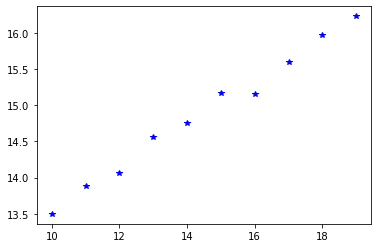

In [9]:
#on represente les resultats obtenu dans une courbe
plt.plot(x, y, "b*")
plt.show()

In [10]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [11]:
slope #a la pente

0.29696484848484855

In [12]:
intercept #b l ordonne a l'origine 

10.581009696969696

In [20]:
yy=[slope*u+intercept for u in x]

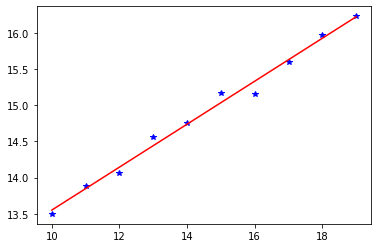

In [21]:
plt.plot(x, y, "b*", x, yy, 'r-')
plt.show()

### conclusion
E($X_n$) ~= 0.289 * n + 10.703

### Simulation de $10^5$  scénario 

In [ ]:
Freq=np.fromiter((sim(20) for i in range(10**5)),dtype=int)

In [148]:
ESP=Freq.sum()/10**5

16.17253

In [11]:
x=list(range(10,20))

In [14]:
y=[np.fromiter((sim(u) for i in range(5*10**4)),dtype=int).sum()/50000 for u in x]

In [15]:
import matplotlib.pyplot as plt

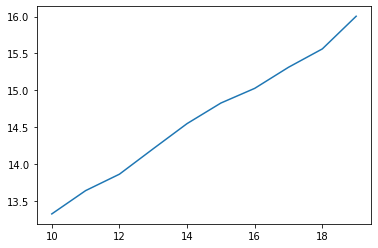

In [16]:
plt.plot(x,y)

In [17]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [18]:
slope

0.28871527272727254

In [19]:
intercept


10.443562545454547